### Masive Data Lab Activities

Description : Read and Cleaning Data
File        : bitcoin_price.csv
Name        : Yudi Aditya

In [75]:
import pandas as pd
import numpy as np
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/cryptocurrencypricehistory/bitcoin_price.csv')
print(df.shape)
df.head()

(1592, 7)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",4228.29,4427.84,3998.11,4376.53,2697970000,69954400000
1,"Sep 04, 2017",4591.63,4591.63,4108.40,4236.31,2987330000,75955500000
2,"Sep 03, 2017",4585.27,4714.08,4417.59,4582.96,1933190000,75841700000
3,"Sep 02, 2017",4901.42,4975.04,4469.24,4578.77,2722140000,81060600000
4,"Sep 01, 2017",4701.76,4892.01,4678.53,4892.01,2599080000,77748400000


In [76]:
#Replace missing data as NaN
df.replace('-', np.nan,inplace=True)
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
1587,"May 02, 2013",116.38,125.60,92.28,105.21,NaN,1292190000
1588,"May 01, 2013",139.00,139.89,107.72,116.99,NaN,1542820000
1589,"Apr 30, 2013",144.00,146.93,134.05,139.00,NaN,1597780000
1590,"Apr 29, 2013",134.44,147.49,134.00,144.54,NaN,1491160000
1591,"Apr 28, 2013",135.30,135.98,132.10,134.21,NaN,1500520000


In [77]:
# Count missing data in each column
missing_date   = df.Date.isnull().sum()
missing_open   = df.Open.isnull().sum()
missing_high   = df.High.isnull().sum()
missing_low    = df.Low.isnull().sum()
missing_close  = df.Close.isnull().sum()
missing_volume = df.Volume.isnull().sum()
missing_market_cap = df['Market Cap'].isnull().sum()

missing_data = pd.DataFrame([[missing_date,missing_open, missing_high, missing_low,missing_close,missing_volume,missing_market_cap]],
                            columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

missing_data

,Date,Open,High,Low,Close,Volume,Market Cap
0,0,0,0,0,0,243,0


Problem  : 
- Volume recognized as a string 
- Missing 243 from 1592 data in Volume 

Solution :
- Convert volume from string to float data type
- interpolation or using mean

In [78]:
# Convert string to float in volume
df.Volume = df.Volume.astype('float64')
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1592.000000,1592.000000,1592.000000,1592.000000,1.349000e+03,1.592000e+03
mean,658.283649,676.271727,641.050616,660.837795,2.009098e+08,9.964862e+09
std,723.653014,749.473657,699.635365,729.447612,4.654899e+08,1.209521e+10
min,68.500000,74.560000,65.530000,68.430000,2.857830e+06,7.792550e+08
25%,258.350000,263.930000,253.177500,258.592500,2.099780e+07,3.648115e+09
50%,444.885000,450.605000,437.180000,444.705000,4.690500e+07,6.449795e+09
75%,680.187500,703.960000,660.775000,682.142500,9.922380e+07,1.021785e+10
max,4901.420000,4975.040000,4678.530000,4892.010000,3.764240e+09,8.106060e+10


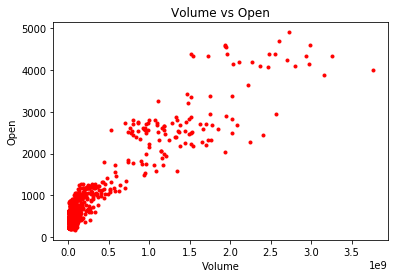

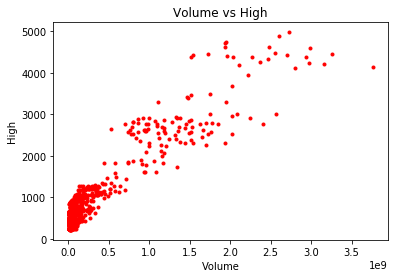

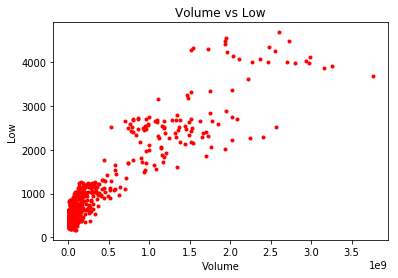

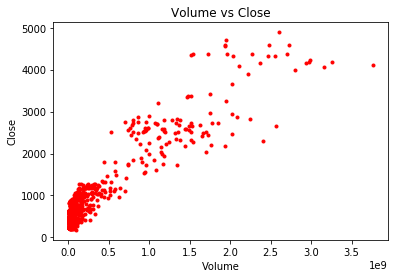

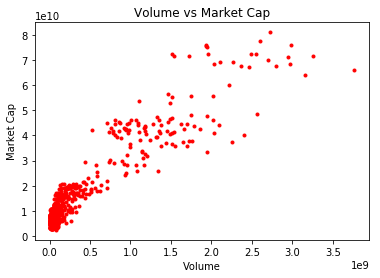

In [79]:
import matplotlib.pyplot as plt

def plot_data(xdata, ydata, ylabel): 
    plt.title('Volume vs ' + ylabel)
    plt.scatter(xdata,ydata,marker='.',color='red')
    plt.xlabel('Volume')
    plt.ylabel(ylabel)
    plt.show()

new_df = df.dropna(subset=['Volume'])
plot_data(new_df['Volume'],new_df['Open'], 'Open')
plot_data(new_df['Volume'],new_df['High'], 'High')
plot_data(new_df['Volume'],new_df['Low'], 'Low')
plot_data(new_df['Volume'],new_df['Close'], 'Close')
plot_data(new_df['Volume'],new_df['Market Cap'], 'Market Cap')

In [80]:
# Fill missing data using mean
df.fillna(df.Volume.mean())
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 05, 2017",4228.29,4427.84,3998.11,4376.53,2.697970e+09,69954400000
1,"Sep 04, 2017",4591.63,4591.63,4108.40,4236.31,2.987330e+09,75955500000
2,"Sep 03, 2017",4585.27,4714.08,4417.59,4582.96,1.933190e+09,75841700000
3,"Sep 02, 2017",4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000
4,"Sep 01, 2017",4701.76,4892.01,4678.53,4892.01,2.599080e+09,77748400000
